# Cancer Detection System with TensorFlow
# This notebook covers:
# 1. Data loading and exploration
# 2. Data visualization
# 3. Data preprocessing and engineering
# 4. Model building with TensorFlow
# 5. Model evaluation
# 6. Saving the model for deployment


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
## 1. Data Loading and Exploration
# For this example, we'll use the Wisconsin Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

In [5]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (569, 32)

First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Malignant


In [6]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

In [7]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
print("\nClass Distribution:")
print(df['diagnosis'].value_counts())


Class Distribution:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64


In [9]:
## 2. Data Visualization
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution')

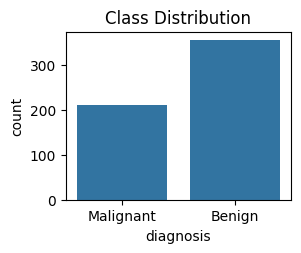

In [10]:
# Target distribution
plt.subplot(2, 2, 1)
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution')

Text(0.5, 1.0, 'Feature Distributions')

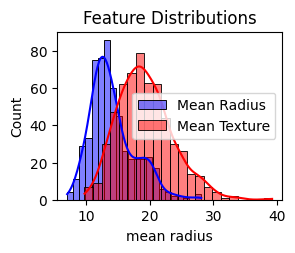

In [11]:
# Feature distributions
plt.subplot(2, 2, 2)
sns.histplot(df['mean radius'], kde=True, color='blue', label='Mean Radius')
sns.histplot(df['mean texture'], kde=True, color='red', label='Mean Texture')
plt.legend()
plt.title('Feature Distributions')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

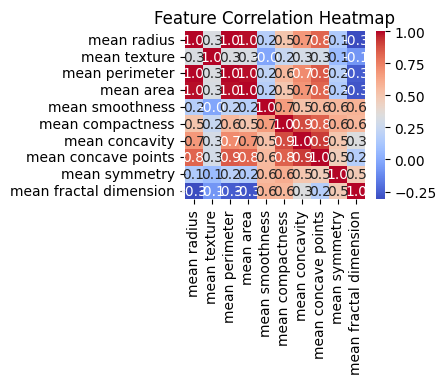

In [12]:
# Correlation heatmap
plt.subplot(2, 2, 3)
corr = df.iloc[:, :10].corr()  # First 10 features for visibility
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

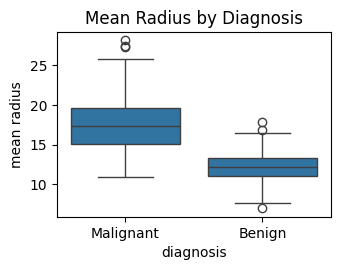

In [13]:
# Boxplot of mean radius by diagnosis
plt.subplot(2, 2, 4)
sns.boxplot(x='diagnosis', y='mean radius', data=df)
plt.title('Mean Radius by Diagnosis')

plt.tight_layout()
plt.show()

In [14]:
## 3. Data Preprocessing and Engineering
# Split features and target
X = df.drop(['target', 'diagnosis'], axis=1)
y = df['target']


In [15]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


In [17]:
## 4. Model Building with TensorFlow
def build_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy',
                 keras.metrics.Precision(name='precision'),
                 keras.metrics.Recall(name='recall'),
                 keras.metrics.AUC(name='auc')]
    )

    return model

In [18]:
# Build and display model
model = build_model(X_train_scaled.shape[1:])
model.summary()

# Add callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.7673 - auc: 0.8173 - loss: 0.5167 - precision: 0.7625 - recall: 0.9398 - val_accuracy: 0.9011 - val_auc: 0.9769 - val_loss: 0.3554 - val_precision: 0.8793 - val_recall: 0.9623 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8945 - auc: 0.9682 - loss: 0.3226 - precision: 0.8751 - recall: 0.9802 - val_accuracy: 0.9560 - val_auc: 0.9888 - val_loss: 0.2327 - val_precision: 0.9455 - val_recall: 0.9811 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9202 - auc: 0.9731 - loss: 0.2508 - precision: 0.9038 - recall: 0.9832 - val_accuracy: 0.9560 - val_auc: 0.9901 - val_loss: 0.1740 - val_precision: 0.9455 - val_recall: 0.9811 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9268 - auc: 0.9826 - loss: 0.1974 - precision: 0.9062 - recall: 0.9914 - val_accuracy: 0.9560 - val_auc: 0.9916 - val_loss: 0.1443 - val_pre

## 5. Model Evaluation

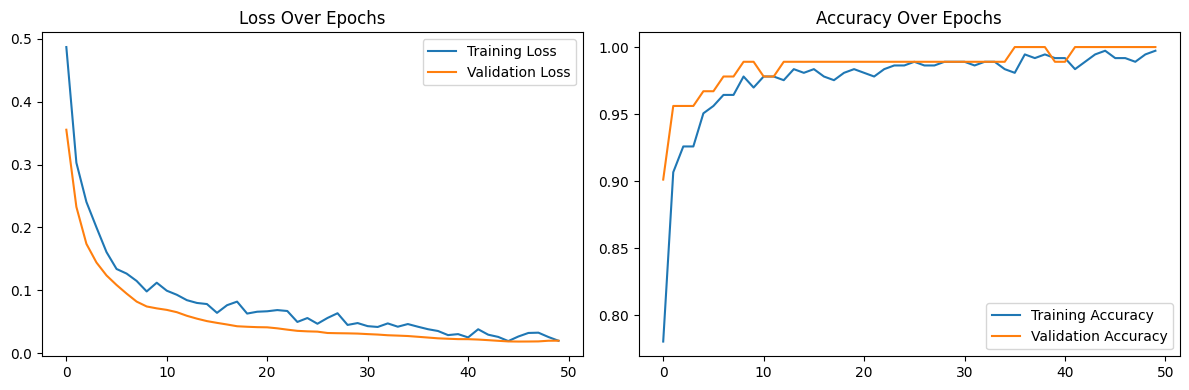

In [20]:

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()

In [21]:
# Evaluate on test set
test_results = model.evaluate(X_test_scaled, y_test, verbose=0)
print("\nTest Set Evaluation:")
print(f"Loss: {test_results[0]:.4f}")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"Precision: {test_results[2]:.4f}")
print(f"Recall: {test_results[3]:.4f}")
print(f"AUC: {test_results[4]:.4f}")



Test Set Evaluation:
Loss: 0.1146
Accuracy: 0.9474
Precision: 0.9853
Recall: 0.9306
AUC: 0.9929


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


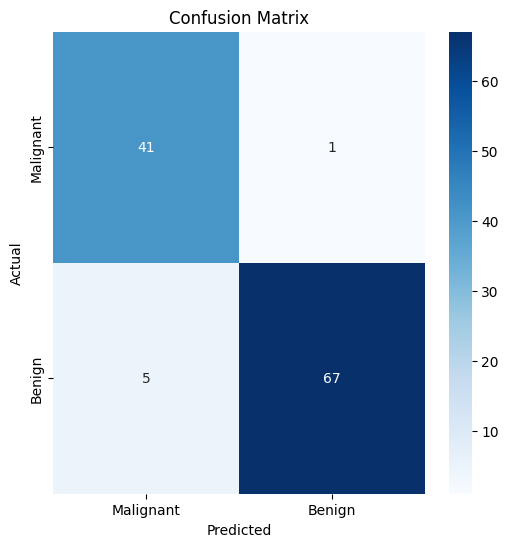

In [22]:
# Predictions and confusion matrix
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))



Classification Report:
              precision    recall  f1-score   support

   Malignant       0.89      0.98      0.93        42
      Benign       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


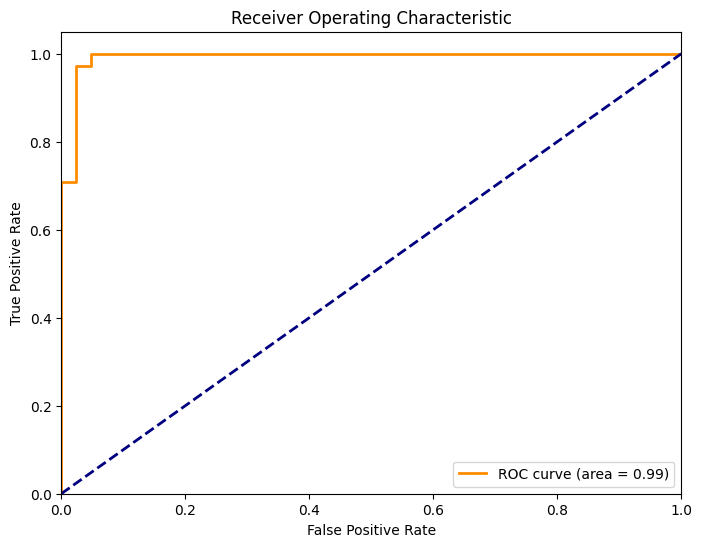

In [25]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [26]:
## 6. Save the Model for Deployment
model.save('cancer_detection_model.h5')


In [27]:
# Also save the scaler for preprocessing new data
import joblib
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
